<a href="https://colab.research.google.com/github/zzhining/time_series_basic/blob/main/stock_market_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주가분석 그래프 그리기 

In [3]:
# https://finance.yahoo.com/
import pandas as pd
import numpy as np
from pandas_datareader import data
import yfinance as yfin
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

yfin.pdr_override()

In [7]:
ticker ={'SAMSUNG':'005930.KS', 'NAVER':'035420.KS', 'KAKAO': '035720.KS'}

# 분석할 기간
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 주가 데이터 가져오기 
df_S = data.get_data_yahoo(ticker['SAMSUNG'], start = start, end = end)
df_N = data.get_data_yahoo(ticker['NAVER'], start = start, end = end)
df_K = data.get_data_yahoo(ticker['KAKAO'], start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
print('삼성전자')
df_S.info()
print('\n네이버')
df_N.info()
print('\n카카오')
df_K.info()

삼성전자
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-12-15 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.4 KB

네이버
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-12-15 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Adj Close  245 non-null    float64
 5   Volume     245 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.4 KB

카

In [11]:
df_S

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-15,76400.0,77600.0,76300.0,77600.0,75865.523438,9584939
2021-12-16,78500.0,78500.0,77400.0,77800.0,76061.054688,11996128
2021-12-17,76800.0,78000.0,76800.0,78000.0,76256.585938,13108479
2021-12-20,77600.0,77800.0,76800.0,77100.0,75376.703125,11264375
2021-12-21,77900.0,78300.0,77500.0,78100.0,76354.343750,14245298
...,...,...,...,...,...,...
2022-12-08,58700.0,59200.0,58600.0,59200.0,59200.000000,12986815
2022-12-09,59300.0,60600.0,59300.0,60400.0,60400.000000,10529632
2022-12-12,59900.0,60000.0,59400.0,59500.0,59500.000000,9036472


In [12]:
df_S['Year']=[d.year for d in df_S.index]
df_S['Month']=[d.month for d in df_S.index]
df_S['Day']=[d.day for d in df_S.index]

df_N['Year']=[d.year for d in df_N.index]
df_N['Month']=[d.month for d in df_N.index]
df_N['Day']=[d.day for d in df_N.index]
 
df_K['Year']=[d.year for d in df_K.index]
df_K['Month']=[d.month for d in df_K.index]
df_K['Day']=[d.day for d in df_K.index]
df_K.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2022-12-08,55900.0,56100.0,54900.0,55500.0,55500.0,1376893,2022,12,8
2022-12-09,56100.0,58200.0,56000.0,58100.0,58100.0,2404261,2022,12,9
2022-12-12,57700.0,58700.0,57000.0,58100.0,58100.0,1402888,2022,12,12
2022-12-13,59000.0,59700.0,57700.0,58200.0,58200.0,1532110,2022,12,13
2022-12-14,58800.0,59500.0,58300.0,58700.0,58700.0,1550967,2022,12,14


In [13]:
df_N['diff Close'] = df_N['Close'] - df_N['Adj Close']
df_N.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,diff Close
Date,,,,,,,,,,
2022-12-08,184000.0,186500.0,181500.0,185500.0,185500.0,709428,2022,12,8,0.0
2022-12-09,187500.0,195000.0,187000.0,195000.0,195000.0,1081470,2022,12,9,0.0
2022-12-12,192500.0,196500.0,190500.0,193000.0,193000.0,652814,2022,12,12,0.0
2022-12-13,195500.0,197000.0,191000.0,193000.0,193000.0,692706,2022,12,13,0.0
2022-12-14,194000.0,195000.0,191500.0,193500.0,193500.0,708760,2022,12,14,0.0


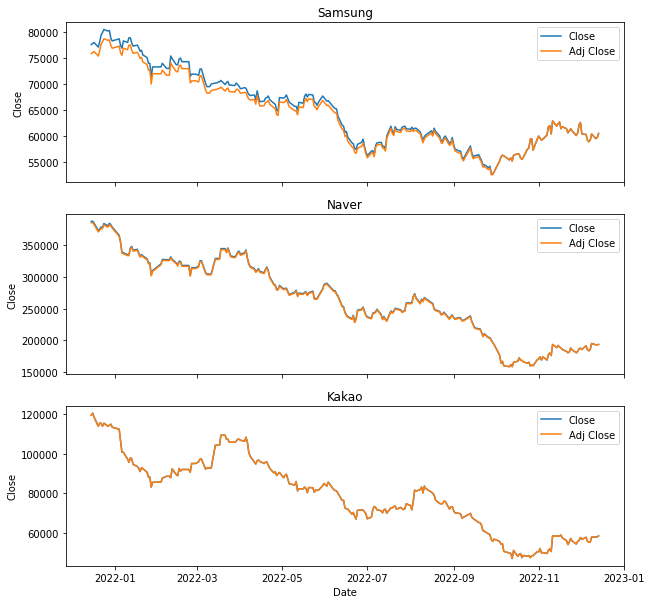

In [16]:
fig, ((ax1),(ax2),(ax3)) = plt.subplots(nrows=3, figsize=(10,10), sharex=True) 
sns.lineplot(data=df_S, x='Date', y='Close', ax=ax1)
sns.lineplot(data=df_S, x='Date', y='Adj Close', ax=ax1)
sns.lineplot(data=df_N, x='Date', y='Close', ax=ax2)
sns.lineplot(data=df_N, x='Date', y='Adj Close', ax=ax2)
sns.lineplot(data=df_K, x='Date', y='Close', ax=ax3)
sns.lineplot(data=df_K, x='Date', y='Adj Close', ax=ax3)
ax1.set_title("Samsung")
ax1.legend(['Close', 'Adj Close'])
ax2.set_title("Naver")
ax2.legend(['Close', 'Adj Close'])
ax3.set_title("Kakao") 
ax3.legend(['Close', 'Adj Close'])

Text(0.5, 1.0, 'Close Stock Prices ')

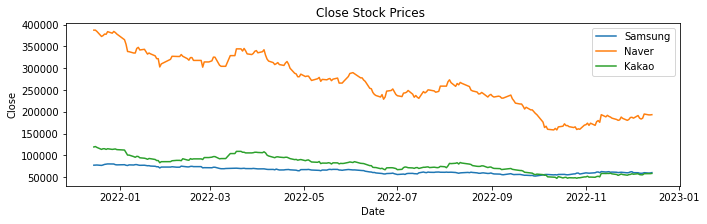

In [17]:
fig, ax = plt.subplots(figsize=(11,3))
sns.lineplot(data=df_S, x='Date', y='Close')
sns.lineplot(data=df_N, x='Date', y='Close')
sns.lineplot(data=df_K, x='Date', y='Close')
ax.legend(['Samsung', 'Naver', 'Kakao'])
ax.set_title("Close Stock Prices ")

Text(0.5, 1.0, 'Volume of Stock traded')

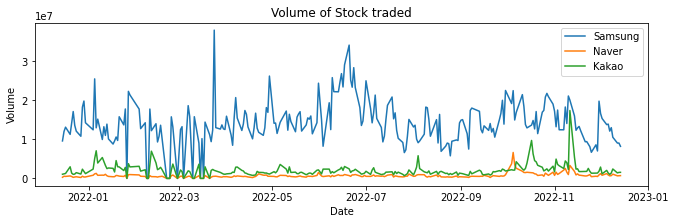

In [18]:
fig, ax = plt.subplots(figsize=(11,3))
sns.lineplot(data=df_S, x='Date', y='Volume')
sns.lineplot(data=df_N, x='Date', y='Volume')
sns.lineplot(data=df_K, x='Date', y='Volume')
ax.legend(['Samsung', 'Naver', 'Kakao'])
ax.set_title("Volume of Stock traded")

Text(0.5, 1.0, 'Market capitalization')

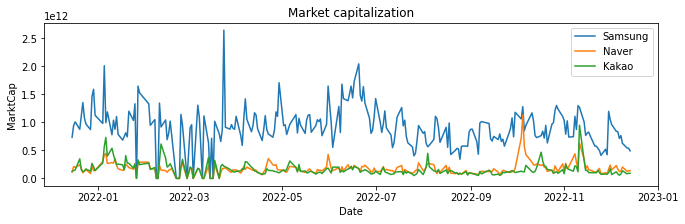

In [19]:
# Market capitalization
df_S['MarktCap'] = df_S['Open'] * df_S['Volume']
df_N['MarktCap'] = df_N['Open'] * df_N['Volume']
df_K['MarktCap'] = df_K['Open'] * df_K['Volume']

fig, ax = plt.subplots(figsize=(11,3)) 
sns.lineplot(data=df_S, x='Date', y='MarktCap')
sns.lineplot(data=df_N, x='Date', y='MarktCap')
sns.lineplot(data=df_K, x='Date', y='MarktCap')
ax.legend(['Samsung', 'Naver', 'Kakao'])
ax.set_title("Market capitalization")

In [27]:
df_S.reset_index(inplace=True)
df_N.reset_index(inplace=True)
df_K.reset_index(inplace=True)

Text(0.5, 1.0, 'Monthly Stock Price Variation')

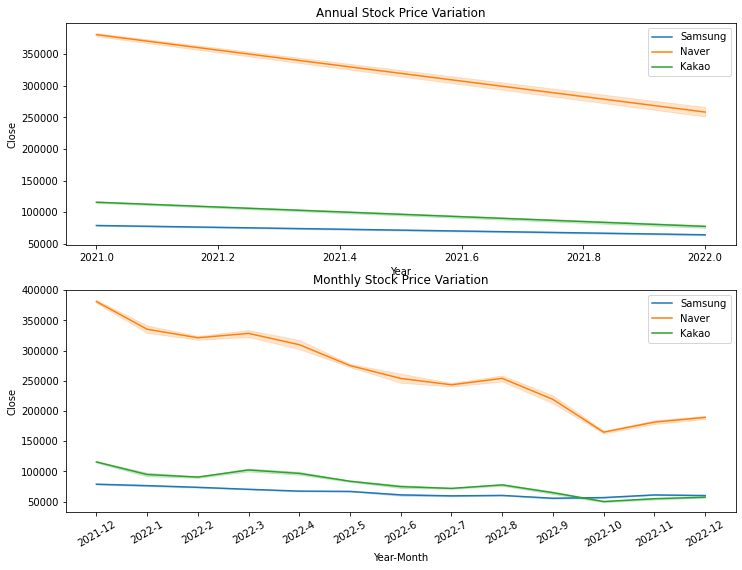

In [30]:
def concatenate_year_month(date):
    return "{}-{}".format(date.year, date.month)
df_S['Year-Month'] = df_S['Date'].apply(concatenate_year_month)
df_N['Year-Month'] = df_N['Date'].apply(concatenate_year_month)
df_K['Year-Month'] = df_K['Date'].apply(concatenate_year_month)

fig, ax= plt.subplots(nrows=2, figsize=(12,9))
plt.xticks(rotation=30)
sns.lineplot(data=df_S, x='Year', y='Close', label='Samsung', ax=ax[0])
sns.lineplot(data=df_N, x='Year', y='Close', label='Naver', ax=ax[0])
sns.lineplot(data=df_K, x='Year', y='Close', label='Kakao', ax=ax[0])
sns.lineplot(data=df_S, x='Year-Month', y='Close', label='Samsung', ax=ax[1])
sns.lineplot(data=df_N, x='Year-Month', y='Close', label='Naver', ax=ax[1])
sns.lineplot(data=df_K, x='Year-Month', y='Close', label='Kakao', ax=ax[1])
ax[0].set_title("Annual Stock Price Variation")
ax[1].set_title("Monthly Stock Price Variation")

Text(0.5, 1.0, 'Monthly Trade Volume Variation')

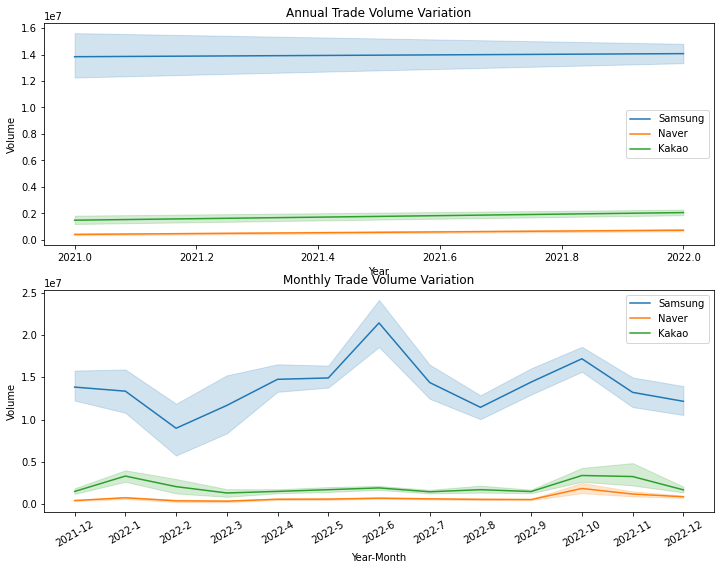

In [31]:
fig, ax= plt.subplots(nrows=2, figsize=(12,9))
plt.xticks(rotation=30)
sns.lineplot(data=df_S, x='Year', y='Volume', label='Samsung', ax=ax[0])
sns.lineplot(data=df_N, x='Year', y='Volume', label='Naver', ax=ax[0])
sns.lineplot(data=df_K, x='Year', y='Volume', label='Kakao', ax=ax[0])
sns.lineplot(data=df_S, x='Year-Month', y='Volume', label='Samsung', ax=ax[1])
sns.lineplot(data=df_N, x='Year-Month', y='Volume', label='Naver', ax=ax[1])
sns.lineplot(data=df_K, x='Year-Month', y='Volume', label='Kakao', ax=ax[1])
ax[0].set_title("Annual Trade Volume Variation")
ax[1].set_title("Monthly Trade Volume Variation")

In [32]:
z_NK=np.polyfit(df_N['Close'],df_K['Close'], 1)
f_NK=np.poly1d(z_NK)
print(f'Naver-Kakao  *slope: {z_NK[0]}, *y intercept: {z_NK[1]}')

z_SN=np.polyfit(df_S['Close'],df_N['Close'], 1)
f_SN=np.poly1d(z_SN)
print(f'Samsung-Naver  *slope: {z_SN[0]}, *y intercept: {z_SN[1]}')

z_SK=np.polyfit(df_S['Close'],df_K['Close'], 1)
f_SK=np.poly1d(z_SK)
print(f'Samsung-Kakao  *slope: {z_SK[0]}, *y intercept: {z_SK[1]}')

Naver-Kakao  *slope: 0.2968564654690352, *y intercept: 726.9131052042362
Samsung-Naver  *slope: 7.5918744551444135, *y intercept: -227850.40139780685
Samsung-Kakao  *slope: 2.186933258813792, *y intercept: -62581.954106623


Text(52000, 115000, 'y=2.186933x+-62581.954107')

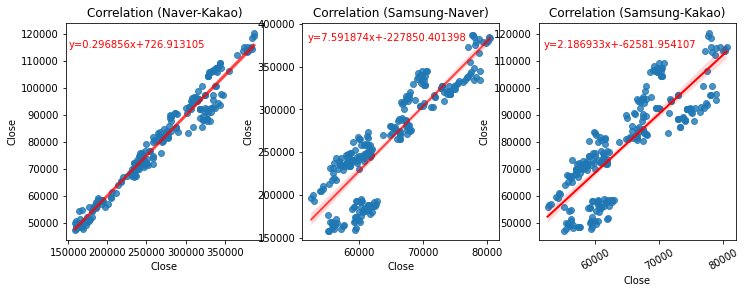

In [38]:
fig, ax= plt.subplots(ncols=3, figsize=(12,4))
plt.xticks(rotation=30)
sns.regplot(x=df_N['Close'], y=df_K['Close'], line_kws={"color":"r", "alpha":0.7, "lw":3}, 
            label='Correlation (Naver-Kakao)',ax=ax[0])
sns.regplot(x=df_S['Close'], y=df_N['Close'], line_kws={"color":"r", "alpha":0.7, "lw":2}, 
            label='Correlation (Samsung-Naver)', ax=ax[1])
sns.regplot(x=df_S['Close'], y=df_K['Close'], line_kws={"color":"r", "alpha":1, "lw":2}, 
            label='Correlation (Samsung-Kakao)', ax=ax[2])
 
ax[0].set_title("Correlation (Naver-Kakao)")
ax[1].set_title("Correlation (Samsung-Naver)")
ax[2].set_title("Correlation (Samsung-Kakao)")
ax[0].text(151000,115000, "y=%fx+%f"%(z_NK[0],z_NK[1]), color="red")
ax[1].text(52000, 380000, "y=%fx+%f"%(z_SN[0],z_SN[1]), color="red")
ax[2].text(52000,115000, "y=%fx+%f"%(z_SK[0],z_SK[1]), color="red")